<img align="left" src="images/GMIT-logo.png" alt="GMIT" width="250"/>                                                      <img align="right" src="images/data-analytics.png" alt="HDipDA" width="300"/>  
# <center> Higher Diploma in Data Analytics - Boston House Prices Project </center> #
  

___________________________________________

**Module Name**: Machine Learning & Statistics  
**Module Number**: 52954  
**Student Name**: Yvonne Brady  
**Student ID**: G00376355  
___________________________________________  


## (20%) Describe: ##
Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter [6] notebook that uses descriptive statistics and plots to describe the Boston House Prices [1] dataset. This part is worth 20% of your overall mark.

## Table of Contents##
1. [Introduction](#intro)  
2. 

## <a name="intro"></a>1. Introduction ##
This project concerns the Boston House Price Dataset, a dataset that comes with sklearn. For the Machine Learning and STatistics Module of the GMIT Higher Diploma in Data Anayltics, we are tasked with:

* Describing the dataset.
* Looking at wherther proximity to the Charles River has an impact on the house prices.
* Building a model so we could predict house prices.


In [1]:
# First things first - import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ts ## not ~available and warnings when tried to install - will wait for now
%matplotlib inline 
# Found this and thought it was worth trying ...
import pandas_profiling

In [2]:
# We need to import the dataset too
from sklearn.datasets import load_boston
bhp = load_boston()

In [3]:
# Lets have a look at what comes with the data
print(bhp.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Lets look at each of the keys to see what they contain.

In [4]:
# See the data
print(bhp.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


Unsurprisingly the data holds the raw numbers of the dataset. Let's see the target:

In [5]:
# Show what the target holds
print(bhp.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

This we would assume are the house prices related to each attribute. Next up - feature names

In [6]:
# Show the feature names
print(bhp.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# The DESCR appears interesting, let's see what that is
print(bhp.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

This is very interesting description of the dataset, tracing its history etc. Note that the target values is called MEDV.

In [8]:
# Show the filename information
print(bhp.filename)

C:\Users\ybrady\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


Now, having seen what is contained in the dataset, time to put it in a dataframe for processing.

In [9]:
# Put the data in a dataframe for easier manipulation
boston = pd.DataFrame(bhp.data, columns=bhp.feature_names)
# And have a look at some random data
boston.sample(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
88   0.05660   0.0   3.41   0.0  0.489  7.007  86.3  3.4217  2.0  270.0   
289  0.04297  52.5   5.32   0.0  0.405  6.565  22.9  7.3172  6.0  293.0   
89   0.05302   0.0   3.41   0.0  0.489  7.079  63.1  3.4145  2.0  270.0   
272  0.11460  20.0   6.96   0.0  0.464  6.538  58.7  3.9175  3.0  223.0   
174  0.08447   0.0   4.05   0.0  0.510  5.859  68.7  2.7019  5.0  296.0   

     PTRATIO       B  LSTAT  
88      17.8  396.90   5.50  
289     16.6  371.72   9.51  
89      17.8  396.06   5.70  
272     18.6  394.96   7.73  
174     16.6  393.23   9.64

In [10]:
# There is no MEDV column so we must add it to the dataframe
boston["MEDV"] = bhp.target
boston.sample(5)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
356   8.98296   0.0  18.10   1.0  0.770  6.212   97.4  2.1222  24.0  666.0   
376  15.28800   0.0  18.10   0.0  0.671  6.649   93.3  1.3449  24.0  666.0   
105   0.13262   0.0   8.56   0.0  0.520  5.851   96.7  2.1069   5.0  384.0   
56    0.02055  85.0   0.74   0.0  0.410  6.383   35.7  9.1876   2.0  313.0   
411  14.05070   0.0  18.10   0.0  0.597  6.657  100.0  1.5275  24.0  666.0   

     PTRATIO       B  LSTAT  MEDV  
356     20.2  377.73  17.60  17.8  
376     20.2  363.02  23.24  13.9  
105     20.9  394.05  16.47  19.5  
56      17.3  396.90   5.77  24.7  
411     20.2   35.05  21.22  17.2

In [11]:
# The pandas profiling report give a good pverviw of the dataset.
profile = pandas_profiling.ProfileReport(boston)
profile

The profiling report tells us that there are 50 rows with 14 variables, no missing or duplicate rows. Of the 14 variables, 12 are numeric, one is categorical and one (TAX) was rejected as is had a very high correlation with RAD. Multi=co-linearity can cause problems as variables are assumed to be independent [[19](#19)], _i.e._ if you are looking at the effects of changing one variable only at a time. Where variables are correlated, you cannot just change one variable alone.  
The report then goes through each variable in turn and describes and plots it. Four different correlation matrices are plotted and sample of rows are shown.

In [12]:
# Check the first few rows
boston.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [13]:
# And the last few
boston.tail(5)

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9

In [14]:
# Check for null values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Start Plotting ##

So, what does the data look like? Let's first look at histograms to see where how the data looks.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B002D7E780>,
      dtype=object)

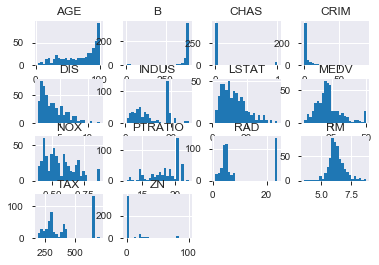

In [15]:
# Just a histogram of each variable to start
boston.hist(bins = 25)

Looking at each of the attributes in isolation we can see that for a few attributes there appears to be a maximum threshold beyond which there are no readings. In particular:
* Age
* B
* MEDV
* NOX
* RAD

Let's see if we are correct in that observation.

In [16]:
# List the "fishy" data
fishy = ["AGE", "B", "MEDV", "NOX", "RAD"]
# Print out the max and the no of rows that have that value
for fish in fishy:
    print(fish, "maximum =", boston[fish].max(), "and there are", boston[boston[fish] == boston[fish].max()][fish].count(), "rows with this value")

AGE maximum = 100.0 and there are 43 rows with this value
B maximum = 396.9 and there are 121 rows with this value
MEDV maximum = 50.0 and there are 16 rows with this value
NOX maximum = 0.871 and there are 16 rows with this value
RAD maximum = 24.0 and there are 132 rows with this value


This somewhat compromises our dataset in that for example you do not know if the maximum value _e.g._ of the MEDV variable is 50.0K or much, much greater. We will re-visit this later.  

As we are primarily interested in house price, lets explore that attribute a bit more.

In [17]:
#Just having a look at the house price element itself
boston["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

### What affects house prices? ###
Need to look at each element individually first to see what affects house prices in particular:  
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population

In [18]:
from scipy import stats
table = []
# for each attribute
for feature in bhp.feature_names:
    # Get the regression lines
    slope, intercept, r2_value, pvalue, stdErr = stats.linregress(boston["MEDV"], boston[feature])
    # Append to a list
    table.append([feature, slope, intercept, r2_value, pvalue, stdErr])

# Create a dataframe with data
dfLinReg = pd.DataFrame(table, columns = ["feature", "slope", "intercept", "r2_value", "pvalue", "stderr"])
dfLinReg

feature     slope   intercept  r2_value        pvalue    stderr
0      CRIM -0.363160   11.796536 -0.388305  1.173987e-19  0.038390
1        ZN  0.914034   -9.232124  0.360445  5.713584e-17  0.105363
2     INDUS -0.360823   19.267130 -0.483725  4.900260e-31  0.029080
3      CHAS  0.004840   -0.039891  0.175260  7.390623e-05  0.001211
4       NOX -0.005384    0.676011 -0.427321  7.065042e-24  0.000507
5        RM  0.053122    5.087639  0.695360  2.487229e-74  0.002446
6       AGE -1.153716   94.571350 -0.376955  1.569982e-18  0.126274
7       DIS  0.057222    2.505669  0.249929  1.206612e-08  0.009875
8       RAD -0.361301   17.690522 -0.381626  5.465933e-19  0.038979
9       TAX -8.585930  601.702260 -0.468536  5.637734e-29  0.721121
10  PTRATIO -0.119530   21.148882 -0.507787  1.609509e-34  0.009033
11        B  3.310092  282.088371  0.333461  1.318113e-14  0.416853
12    LSTAT -0.572756   25.558859 -0.737663  5.081103e-88  0.023351

The dataframe above shows the best correlations with LSTAT (% of population from lower status), which shows an inverse relationship with house price, and RM (number of rooms). This correlates well with the Correlation tables in the profile above. 

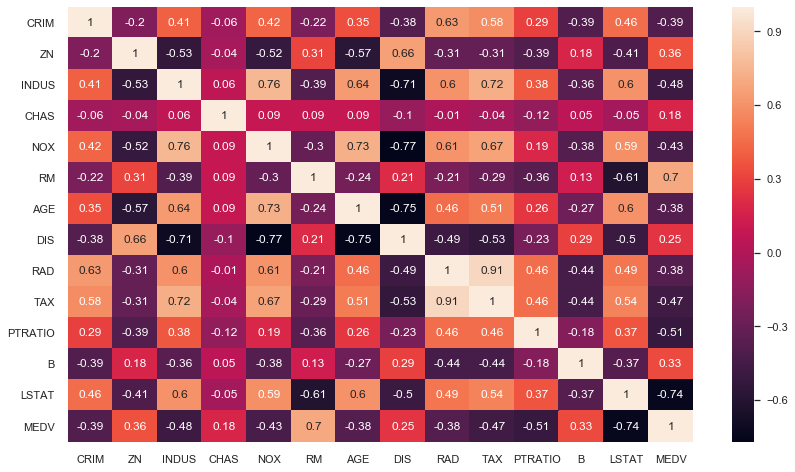

In [19]:
sns.set(rc={'figure.figsize':(14,8)})
# Look at the correlation matrix - tallies well with results above.
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Text(0.5, 0.98, 'Factors Affecting House Prices')

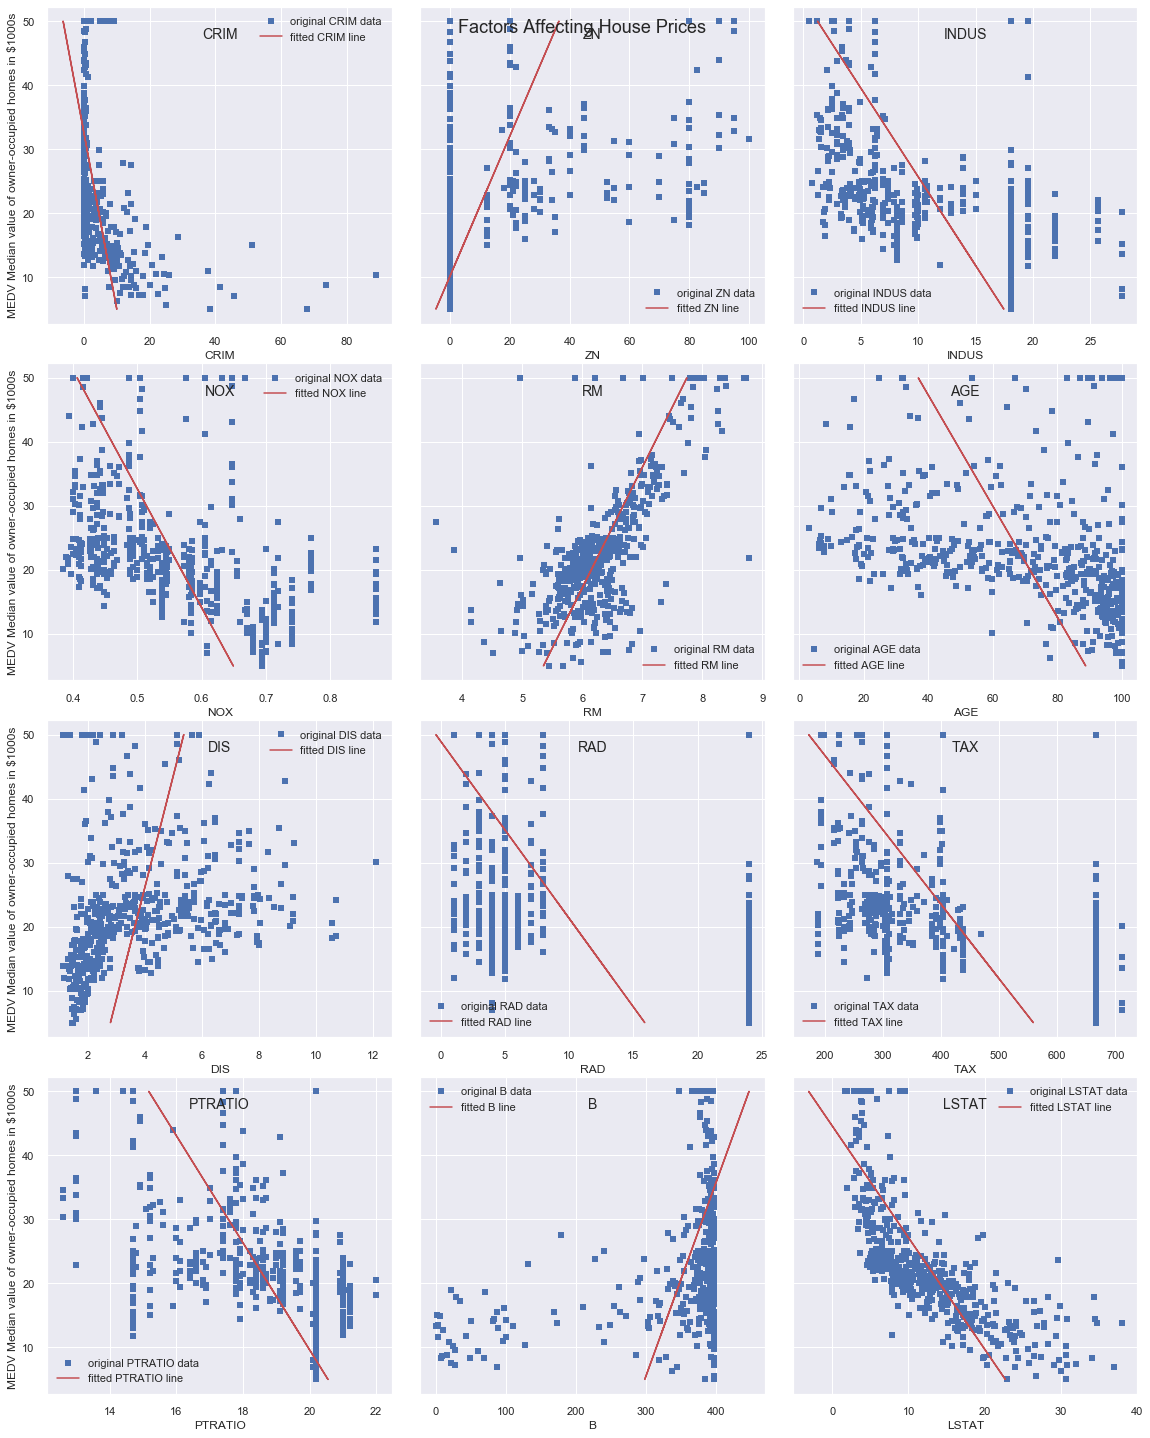

In [20]:
# Setting the plot size
plt.rcParams['figure.figsize'] = [16,20]

# Plot both the raw data and the "best fit" lines
fig, axs = plt.subplots(4, 3, sharey=True)
fig.tight_layout()

# Need two counters here to take care of the fact we are not printing CHAS (1/0 values only)
i, j = 0, 0

# Iterate through the features and plot each one
for feature in bhp.feature_names:
    # Exclude the CHAS and MEDV ones - MEDV we are already plotting against and CHAS as there is only 1 / 0 values
    if feature != "CHAS" and feature != "MEDV":
        # Scatter plot of original data
        axs[divmod(i, 3)].plot(boston[feature], boston["MEDV"], 'bs', label= "original "+ feature + " data")
        # Add the calculated regression line
        axs[divmod(i, 3)].plot(dfLinReg.intercept[j] + dfLinReg.slope[j]*boston["MEDV"], boston["MEDV"], 'r', label="fitted "+ feature +" line")
        # And the legend
        axs[divmod(i, 3)].legend()
        # Add labels for x axis
        axs[divmod(i, 3)].text(.5,.9, feature, horizontalalignment="center",transform=axs[divmod(i, 3)].transAxes,fontsize=14)
        axs[divmod(i, 3)].set_xlabel(feature)
        # Increment the i counter for correct placement of plot
        i +=1
    # Always increment j counter (i not incremented on CHAS)
    j+=1

# Add y-axis labels
axs[0,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')
axs[1,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')
axs[2,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')
axs[3,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')

# Titles
fig.suptitle('Factors Affecting House Prices', fontsize=18)


Looking at the plots individually, we can hypothesise on possible correlations. It is likely many of these supposed correlations will be more imagined than real, but we will explore them nonetheless as this may help us spot fake relationships in the future.  
  
**CRIM**: Within the entire dataset there appears to be no relationship, but may warrant further scrutiny where the crime rate is not 0.  
**ZN**: Similar to the crime rate. We could look at any relationship where the 0 values are excluded.  
**INDUS**: Could look at excluding house prices under \\$40K   
**NOX**: Similar to INDUS, could exclude the higher priced homes. Unsurprisingly this plot tallies with the INDUS plot.   
**RM**:  A clear linear proportional relationship exists.  
**AGE**: Possible relationship excluding the higher priced homes.  
**DIS**: There may be a $y = a \sqrt{x} $ relationship  
**RAD**: Struggling to find any kind of relationship here.  
**TAX**: Again, no obvious relationship barring a general trend toward higher taxes meaning lower house prices, but the data values are very spread for this to pursue.  
**PTRATIO**: Similar to the TAX plot above  
**B**: Could look at relationship excluding upper-end B values  
**LSTAT**: While this shows one of the best $r^2$ values the shape of the graph may warrant whether a $y=\frac{1}{x}$ may be a better fit here.

It is likely that many of these relationships are not worthy of further investigation.

**Investigation of adjustments described above**

In [21]:
boston_nocrim = boston.loc[boston.CRIM > 2]
boston_nozn = boston.loc[boston.ZN>5]

In [22]:
crim0_slope, crim0_intercept, crim0_r2, crim0_p, crim0_stdErr = stats.linregress(boston_nocrim["MEDV"], boston_nocrim["CRIM"])
zn0_slope, zn0_intercept, zn0_r2, zn0_p, zn0_stdErr = stats.linregress(boston_nozn["MEDV"], boston_nozn["ZN"])


In [23]:
print("Full dataset r^2 values for CRIM (", len(boston),") vs adjusted CRIM (", len(boston_nocrim),"):", dfLinReg[dfLinReg.feature == "CRIM"].r2_value.item(), "vs",crim0_r2)
print("Full dataset r^2 values for ZN (", len(boston),") vs adjusted ZN (", len(boston_nozn),"):", dfLinReg.r2_value[dfLinReg.feature == "ZN"].item(), "vs", zn0_r2)


Full dataset r^2 values for CRIM ( 506 ) vs adjusted CRIM ( 150 ): -0.3883046085868113 vs -0.3486104206965284
Full dataset r^2 values for ZN ( 506 ) vs adjusted ZN ( 134 ): 0.3604453424505433 vs 0.20841302081053192


So reducing the dataset to get better correlation with CRIM and ZN actually worsened the $r^2$ values in both scenarios!

In [24]:
altBoston = boston.loc[boston.MEDV < 40.0]
altIndus_slope, altIndus_intercept, altIndus_r2, altIndus_p, altIndus_stdErr = stats.linregress(altBoston["MEDV"], altBoston["INDUS"])
altNox_slope, altNox_intercept, altNox_r2, altNox_p, altNox_stdErr = stats.linregress(altBoston["MEDV"], altBoston["NOX"])
altAge_slope, altAge_intercept, altAge_r2, altAge_p, altAge_stdErr = stats.linregress(altBoston["MEDV"], altBoston["AGE"])


In [25]:
print("Full dataset r^2 values for INDUS (", len(boston),") vs adjusted INDUS (", len(altBoston),"):", dfLinReg[dfLinReg.feature == "INDUS"].r2_value.item(), "vs",altIndus_r2)
print("Full dataset r^2 values for NOX (", len(boston),") vs adjusted NOX (", len(altBoston),"):", dfLinReg.r2_value[dfLinReg.feature == "NOX"].item(), "vs", altNox_r2)
print("Full dataset r^2 values for AGE (", len(boston),") vs adjusted AGE (", len(altBoston),"):", dfLinReg.r2_value[dfLinReg.feature == "AGE"].item(), "vs", altAge_r2)


Full dataset r^2 values for INDUS ( 506 ) vs adjusted INDUS ( 475 ): -0.48372516002837285 vs -0.6208291345688333
Full dataset r^2 values for NOX ( 506 ) vs adjusted NOX ( 475 ): -0.4273207723732824 vs -0.5706001063429771
Full dataset r^2 values for AGE ( 506 ) vs adjusted AGE ( 475 ): -0.37695456500459606 vs -0.5350579000220633


The reduced dataset for the INDUS, NOX and AGE attributes improved the $r^2$ values.

**Multi-Linear Regression**  
Looking at the two variables, RM and LSTAT - try using multi-linear regression

In [26]:
# Import linear_model from sklearn
import sklearn.linear_model as ln

In [27]:
# Create a linear regression model instance
m = ln.LinearRegression()

In [28]:
x = boston[["RM","LSTAT"]] # comparing against the best two variables
y = boston.MEDV

In [29]:
m.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# See how well it fit:
print("Score of RM alone", dfLinReg.r2_value[dfLinReg.feature == "RM"].item())
print("Score of LSTAT alone", dfLinReg.r2_value[dfLinReg.feature == "LSTAT"].item())
print("Score when both are used together",m.score(x,y))

Score of RM alone 0.695359947071539
Score of LSTAT alone -0.7376627261740147
Score when both are used together 0.6385616062603403


This value is lower than either the RM or LSTAT R2 values!

In [31]:
x = boston[["RM", "INDUS"]]
m.fit(x,y)
print("Score of RM alone", dfLinReg.r2_value[dfLinReg.feature == "RM"].item())
print("Score of INDUS alone", dfLinReg.r2_value[dfLinReg.feature == "INDUS"].item())
print("Score when both are used together",m.score(x,y))

Score of RM alone 0.695359947071539
Score of INDUS alone -0.48372516002837285
Score when both are used together 0.5362984005856312


In [32]:
x = boston[["LSTAT", "INDUS"]]
m.fit(x,y)
print("Score of LSTAT alone", dfLinReg.r2_value[dfLinReg.feature == "LSTAT"].item())
print("Score of INDUS alone", dfLinReg.r2_value[dfLinReg.feature == "INDUS"].item())
print("Score when both are used together",m.score(x,y))

Score of LSTAT alone -0.7376627261740147
Score of INDUS alone -0.48372516002837285
Score when both are used together 0.5464577805111691


So far the best regression $r^2$ values may be seen using the LSTAT and RM variables - separately. We will revist these later when we go to predict.

### The Charles River Effect
A requirement of this project was to look at the effect of the CHAS attribute which indicates proximity to the Charles River. We want to investigate to see if there is a significant difference in median house prices between houses that are along the Charles river and those that are not.  
<img src="images/Charles-River.jpg"/>

First lets look at the data in both cases:

In [33]:
# Let's have a look at the stats for properties beside the Charles River
boston.loc[boston.CHAS == 1].describe()

CRIM         ZN      INDUS  CHAS        NOX         RM        AGE  \
count  35.000000  35.000000  35.000000  35.0  35.000000  35.000000   35.00000   
mean    1.851670   7.714286  12.719143   1.0   0.593426   6.519600   77.50000   
std     2.494072  18.800143   5.957623   0.0   0.144736   0.876416   22.02134   
min     0.015010   0.000000   1.210000   1.0   0.401000   5.012000   24.80000   
25%     0.125060   0.000000   6.410000   1.0   0.489000   5.935500   60.30000   
50%     0.447910   0.000000  13.890000   1.0   0.550000   6.250000   88.50000   
75%     3.397665   0.000000  18.100000   1.0   0.693000   6.915000   93.20000   
max     8.982960  90.000000  19.580000   1.0   0.871000   8.780000  100.00000   

             DIS        RAD         TAX    PTRATIO           B      LSTAT  \
count  35.000000  35.000000   35.000000  35.000000   35.000000  35.000000   
mean    3.029709   9.314286  386.257143  17.491429  372.997429  11.241714   
std     1.254728   8.248962  165.012004   2.081766   53.382820   6.686651   
min     1.129600   1.000000  198.000000  13.600000   88.010000   1.920000   
25%     1.904700   4.000000  276.000000  15.650000  376.200000   5.395000   
50%     3.048000   5.000000  307.000000  17.600000  390.770000  10.500000   
75%     3.897300   8.000000  403.000000  18.600000  393.595000  15.070000   
max     5.885000  24.000000  666.000000  20.200000  396.900000  26.820000   

            MEDV  
count  35.000000  
mean   28.440000  
std    11.816643  
min    13.400000  
25%    21.100000  
50%    23.300000  
75%    33.150000  
max    50.000000

In [34]:
# Let#'s have a look at the stats for properties not beside the Charles River
boston.loc[boston.CHAS == 0].describe()

CRIM          ZN       INDUS   CHAS         NOX          RM  \
count  471.000000  471.000000  471.000000  471.0  471.000000  471.000000   
mean     3.744447   11.634820   11.019193    0.0    0.551817    6.267174   
std      8.876818   23.617979    6.913850    0.0    0.113102    0.685895   
min      0.006320    0.000000    0.460000    0.0    0.385000    3.561000   
25%      0.079640    0.000000    5.040000    0.0    0.448000    5.882000   
50%      0.245220    0.000000    8.560000    0.0    0.538000    6.202000   
75%      3.695030   12.500000   18.100000    0.0    0.624000    6.594000   
max     88.976200  100.000000   27.740000    0.0    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  471.000000  471.000000  471.000000  471.000000  471.000000  471.000000   
mean    67.911677    3.851915    9.566879  409.870488   18.527176  355.461040   
std     28.458924    2.145567    8.748452  168.853790    2.155958   93.423542   
min      2.900000    1.137000    1.000000  187.000000   12.600000    0.320000   
25%     42.500000    2.105250    4.000000  282.500000   17.400000  375.365000   
50%     76.500000    3.215700    5.000000  330.000000   19.100000  391.830000   
75%     94.100000    5.287300   24.000000  666.000000   20.200000  396.375000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  471.000000  471.000000  
mean    12.757941   22.093843  
std      7.169271    8.831362  
min      1.730000    5.000000  
25%      7.160000   16.600000  
50%     11.380000   20.900000  
75%     17.095000   24.800000  
max     37.970000   50.000000

In [35]:
# The dataset pertaining to CHAS
boston.loc[boston.CHAS == 1]

CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
142  3.32105   0.0  19.58   1.0  0.8710  5.403  100.0  1.3216   5.0  403.0   
152  1.12658   0.0  19.58   1.0  0.8710  5.012   88.0  1.6102   5.0  403.0   
154  1.41385   0.0  19.58   1.0  0.8710  6.129   96.0  1.7494   5.0  403.0   
155  3.53501   0.0  19.58   1.0  0.8710  6.152   82.6  1.7455   5.0  403.0   
160  1.27346   0.0  19.58   1.0  0.6050  6.250   92.6  1.7984   5.0  403.0   
162  1.83377   0.0  19.58   1.0  0.6050  7.802   98.2  2.0407   5.0  403.0   
163  1.51902   0.0  19.58   1.0  0.6050  8.375   93.9  2.1620   5.0  403.0   
208  0.13587   0.0  10.59   1.0  0.4890  6.064   59.1  4.2392   4.0  277.0   
209  0.43571   0.0  10.59   1.0  0.4890  5.344  100.0  3.8750   4.0  277.0   
210  0.17446   0.0  10.59   1.0  0.4890  5.960   92.1  3.8771   4.0  277.0   
211  0.37578   0.0  10.59   1.0  0.4890  5.404   88.6  3.6650   4.0  277.0   
212  0.21719   0.0  10.59   1.0  0.4890  5.807   53.8  3.6526   4.0  277.0   
216  0.04560   0.0  13.89   1.0  0.5500  5.888   56.0  3.1121   5.0  276.0   
218  0.11069   0.0  13.89   1.0  0.5500  5.951   93.8  2.8893   5.0  276.0   
219  0.11425   0.0  13.89   1.0  0.5500  6.373   92.4  3.3633   5.0  276.0   
220  0.35809   0.0   6.20   1.0  0.5070  6.951   88.5  2.8617   8.0  307.0   
221  0.40771   0.0   6.20   1.0  0.5070  6.164   91.3  3.0480   8.0  307.0   
222  0.62356   0.0   6.20   1.0  0.5070  6.879   77.7  3.2721   8.0  307.0   
234  0.44791   0.0   6.20   1.0  0.5070  6.726   66.5  3.6519   8.0  307.0   
236  0.52058   0.0   6.20   1.0  0.5070  6.631   76.5  4.1480   8.0  307.0   
269  0.09065  20.0   6.96   1.0  0.4640  5.920   61.5  3.9175   3.0  223.0   
273  0.22188  20.0   6.96   1.0  0.4640  7.691   51.8  4.3665   3.0  223.0   
274  0.05644  40.0   6.41   1.0  0.4470  6.758   32.9  4.0776   4.0  254.0   
276  0.10469  40.0   6.41   1.0  0.4470  7.267   49.0  4.7872   4.0  254.0   
277  0.06127  40.0   6.41   1.0  0.4470  6.826   27.6  4.8628   4.0  254.0   
282  0.06129  20.0   3.33   1.0  0.4429  7.645   49.7  5.2119   5.0  216.0   
283  0.01501  90.0   1.21   1.0  0.4010  7.923   24.8  5.8850   1.0  198.0   
356  8.98296   0.0  18.10   1.0  0.7700  6.212   97.4  2.1222  24.0  666.0   
357  3.84970   0.0  18.10   1.0  0.7700  6.395   91.0  2.5052  24.0  666.0   
358  5.20177   0.0  18.10   1.0  0.7700  6.127   83.4  2.7227  24.0  666.0   
363  4.22239   0.0  18.10   1.0  0.7700  5.803   89.0  1.9047  24.0  666.0   
364  3.47428   0.0  18.10   1.0  0.7180  8.780   82.9  1.9047  24.0  666.0   
369  5.66998   0.0  18.10   1.0  0.6310  6.683   96.8  1.3567  24.0  666.0   
370  6.53876   0.0  18.10   1.0  0.6310  7.016   97.5  1.2024  24.0  666.0   
372  8.26725   0.0  18.10   1.0  0.6680  5.875   89.6  1.1296  24.0  666.0   

     PTRATIO       B  LSTAT  MEDV  
142     14.7  396.90  26.82  13.4  
152     14.7  343.28  12.12  15.3  
154     14.7  321.02  15.12  17.0  
155     14.7   88.01  15.02  15.6  
160     14.7  338.92   5.50  27.0  
162     14.7  389.61   1.92  50.0  
163     14.7  388.45   3.32  50.0  
208     18.6  381.32  14.66  24.4  
209     18.6  396.90  23.09  20.0  
210     18.6  393.25  17.27  21.7  
211     18.6  395.24  23.98  19.3  
212     18.6  390.94  16.03  22.4  
216     16.4  392.80  13.51  23.3  
218     16.4  396.90  17.92  21.5  
219     16.4  393.74  10.50  23.0  
220     17.4  391.70   9.71  26.7  
221     17.4  395.24  21.46  21.7  
222     17.4  390.39   9.93  27.5  
234     17.4  360.20   8.05  29.0  
236     17.4  388.45   9.54  25.1  
269     18.6  391.34  13.65  20.7  
273     18.6  390.77   6.58  35.2  
274     17.6  396.90   3.53  32.4  
276     17.6  389.25   6.05  33.2  
277     17.6  393.45   4.16  33.1  
282     14.9  377.07   3.01  46.0  
283     13.6  395.52   3.16  50.0  
356     20.2  377.73  17.60  17.8  
357     20.2  391.34  13.27  21.7  
358     20.2  395.43  11.48  22.7  
363     20.2  353.04  14.64  16.8  
364     20.2  354.55   5.29  21.9  
369     20.

In [36]:
# And the one where the houses are not adjacent to Charles River
boston.loc[boston.CHAS == 0]

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   5.0  311.0   
12    0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509   5.0  311.0   
13    0.62976   0.0   8.14   0.0  0.538  5.949   61.8  4.7075   4.0  307.0   
14    0.63796   0.0   8.14   0.0  0.538  6.096   84.5  4.4619   4.0  307.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
16    1.05393   0.0   8.14   0.0  0.538  5.935   29.3  4.4986   4.0  307.0   
17    0.78420   0.0   8.14   0.0  0.538  5.990   81.7  4.2579   4.0  307.0   
18    0.80271   0.0   8.14   0.0  0.538  5.456   36.6  3.7965   4.0  307.0   
19    0.72580   0.0   8.14   0.0  0.538  5.727   69.5  3.7965   4.0  307.0   
20    1.25179   0.0   8.14   0.0  0.538  5.570   98.1  3.7979   4.0  307.0   
21    0.85204   0.0   8.14   0.0  0.538  5.965   89.2  4.0123   4.0  307.0   
22    1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
23    0.98843   0.0   8.14   0.0  0.538  5.813  100.0  4.0952   4.0  307.0   
24    0.75026   0.0   8.14   0.0  0.538  5.924   94.1  4.3996   4.0  307.0   
25    0.84054   0.0   8.14   0.0  0.538  5.599   85.7  4.4546   4.0  307.0   
26    0.67191   0.0   8.14   0.0  0.538  5.813   90.3  4.6820   4.0  307.0   
27    0.95577   0.0   8.14   0.0  0.538  6.047   88.8  4.4534   4.0  307.0   
28    0.77299   0.0   8.14   0.0  0.538  6.495   94.4  4.4547   4.0  307.0   
29    1.00245   0.0   8.14   0.0  0.538  6.674   87.3  4.2390   4.0  307.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
476   4.87141   0.0  18.10   0.0  0.614  6.484   93.6  2.3053  24.0  666.0   
477  15.02340   0.0  18.10   0.0  0.614  5.304   97.3  2.1007  24.0  666.0   
478  10.23300   0.0  18.10   0.0  0.614  6.185   96.7  2.1705  24.0  666.0   
479  14.33370   0.0  18.10   0.0  0.614  6.229   88.0  1.9512  24.0  666.0   
480   5.82401   0.0  18.10   0.0  0.532  6.242   64.7  3.4242  24.0  666.0   
481   5.70818   0.0  18.10   0.0  0.532  6.750   74.9  3.3317  24.0  666.0   
482   5.73116   0.0  18.10   0.0  0.532  7.061   77.0  3.4106  24.0  666.0   
483   2.81838   0.0  18.10   0.0  0.532  5.762   40.3  4.0983  24.0  666.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
485   3.67367   0.0  18.10   0.0  0.583  6.312   51.9  3.9917  24.0  666.0   
486   5.69175   0.0  18.10   0.0  0.583  6.114   79.8  3.5459  24.0  666.0   
487   4.83567   0.0  18.10   0.0  0.583  5.905   53.2  3.1523  24.0  666.0   
488   0.15086   0.0  27.74   0.0  0.609  5.454   92.7  1.8209   4.0  711.0   
489   0.18337   0.0  27.74   0.0  0.609  5.414   98.3  1.7554   4.0  711.0   
490   0.20746   0.0  27.74   0.0  0.609  5.093   98.0  1.8226   4.0  711.0   
491   0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
492   0.11132   0.0  27.74   0.0  0.609  5.983   83.5  2.1099   4.0  711.0   
493   0.17331   0.0   9.69   0.0  0.585  5.707   54.0  2.3817   6.0  391.0   
494   0.27957   0.0   9.69   0.0  0.585  5.926   42.6  2.3817   6.0  391.0   
495   0.17899   0.0   9.69   0.

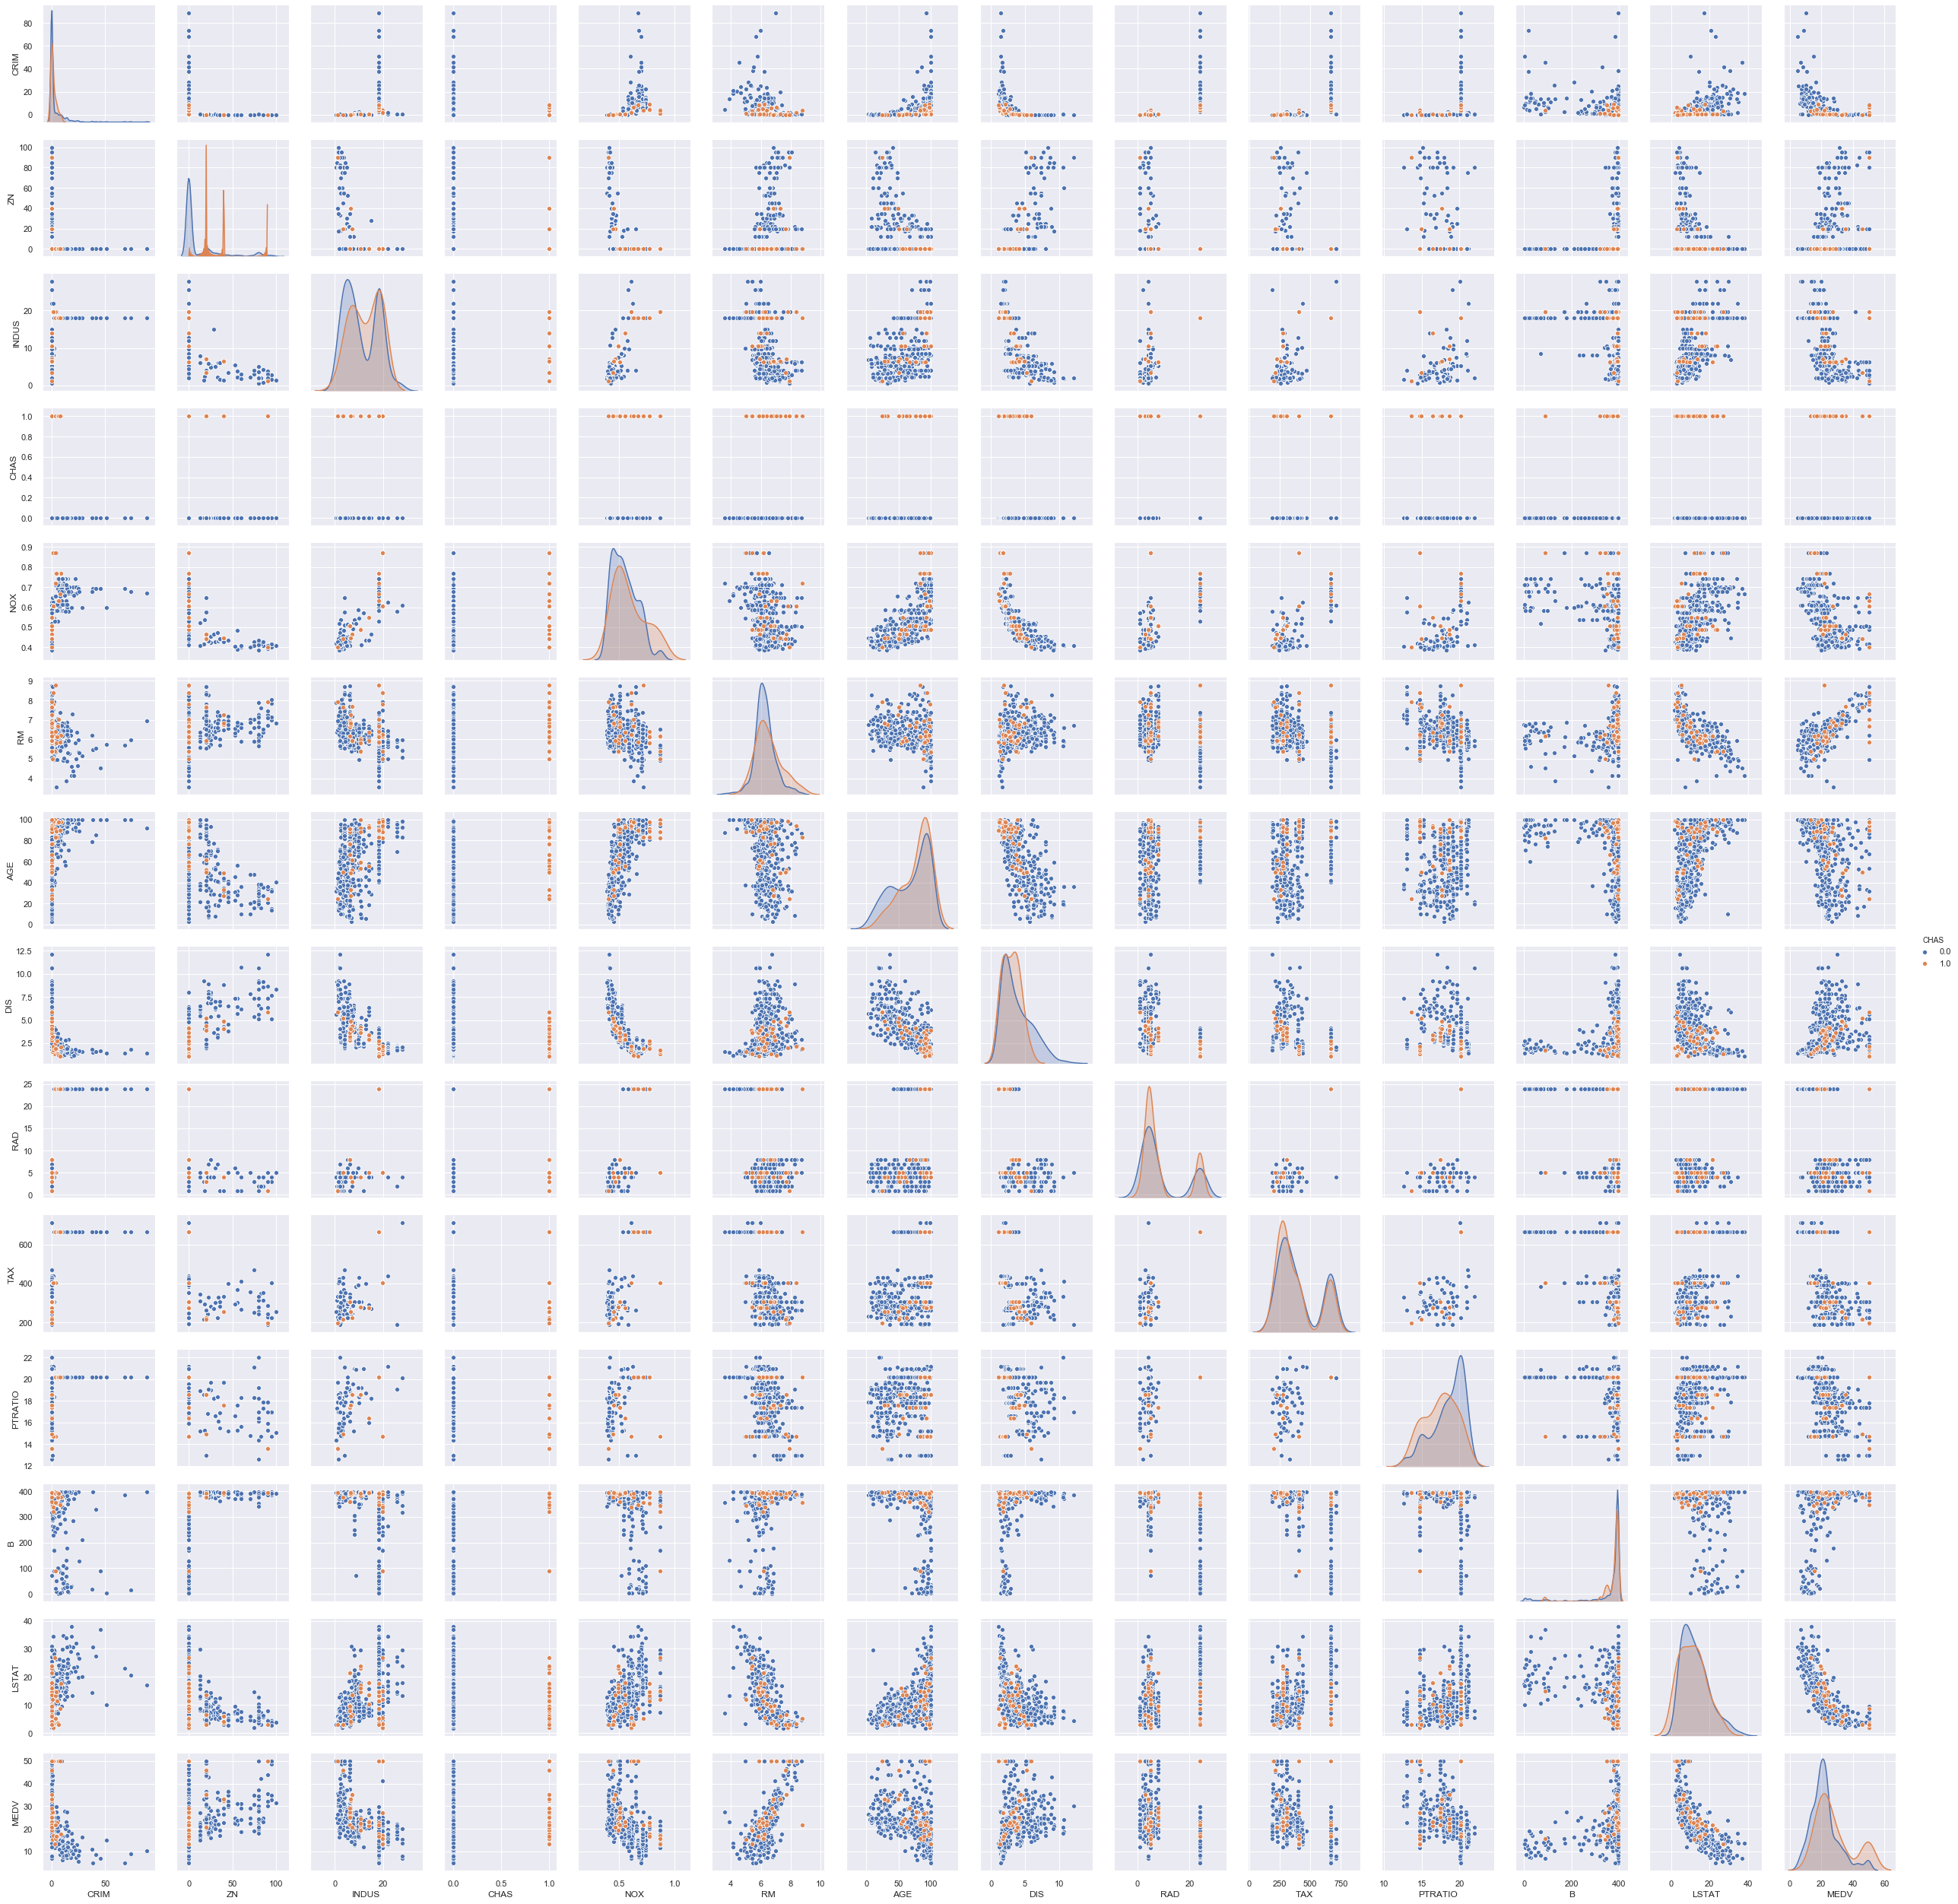

In [37]:
# A 14 x14 plot! 
sns.pairplot(boston, hue = "CHAS")

0.0         AxesSubplot(0.1,0.15;0.363636x0.75)
1.0    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

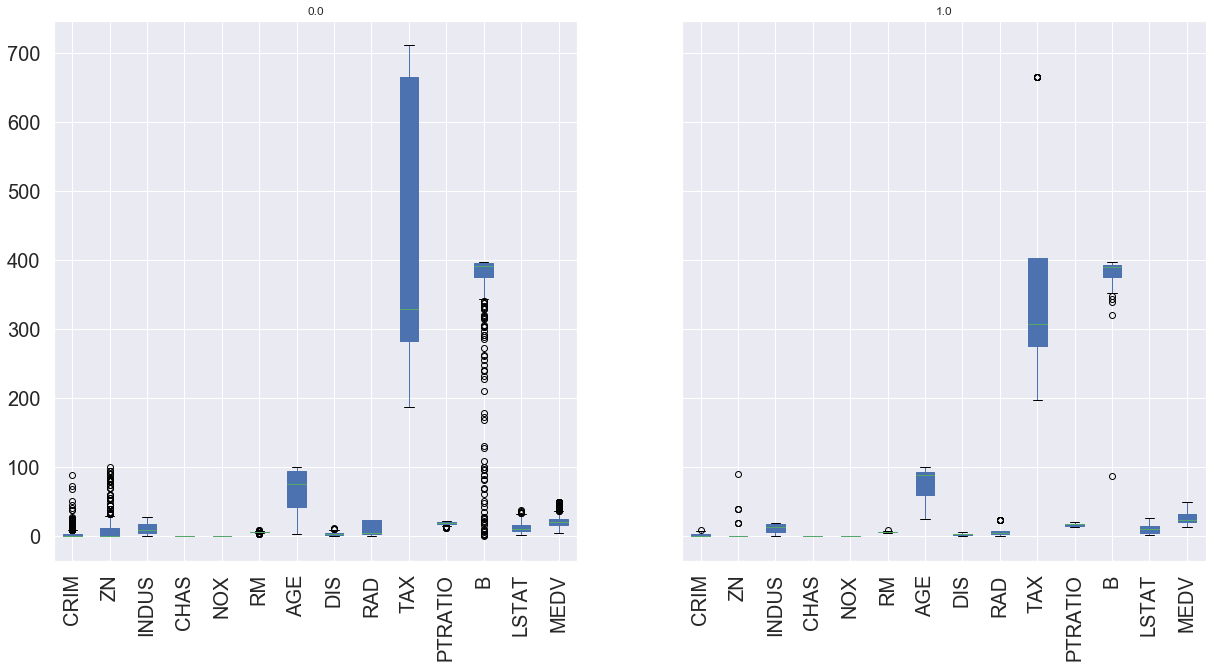

In [38]:
# Do two boxplots of all the attributes based on whether they are fro row adjacent to the Charles River or not
boston.groupby('CHAS').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

While the above have plenty of data - it is hard to see the wood for the trees, so instead lets do the same, except this time only concentrating on the CHAS and MEDV attributes.

In [39]:
# Some stats on the MEDV data where the houses are not adjacent to the river
boston.MEDV.where(boston.CHAS == 0.0).describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

In [40]:
# Some stats on the MEDV data where the houses are adjacent to the river
boston.MEDV.where(boston.CHAS == 1.0).describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MEDV, dtype: float64

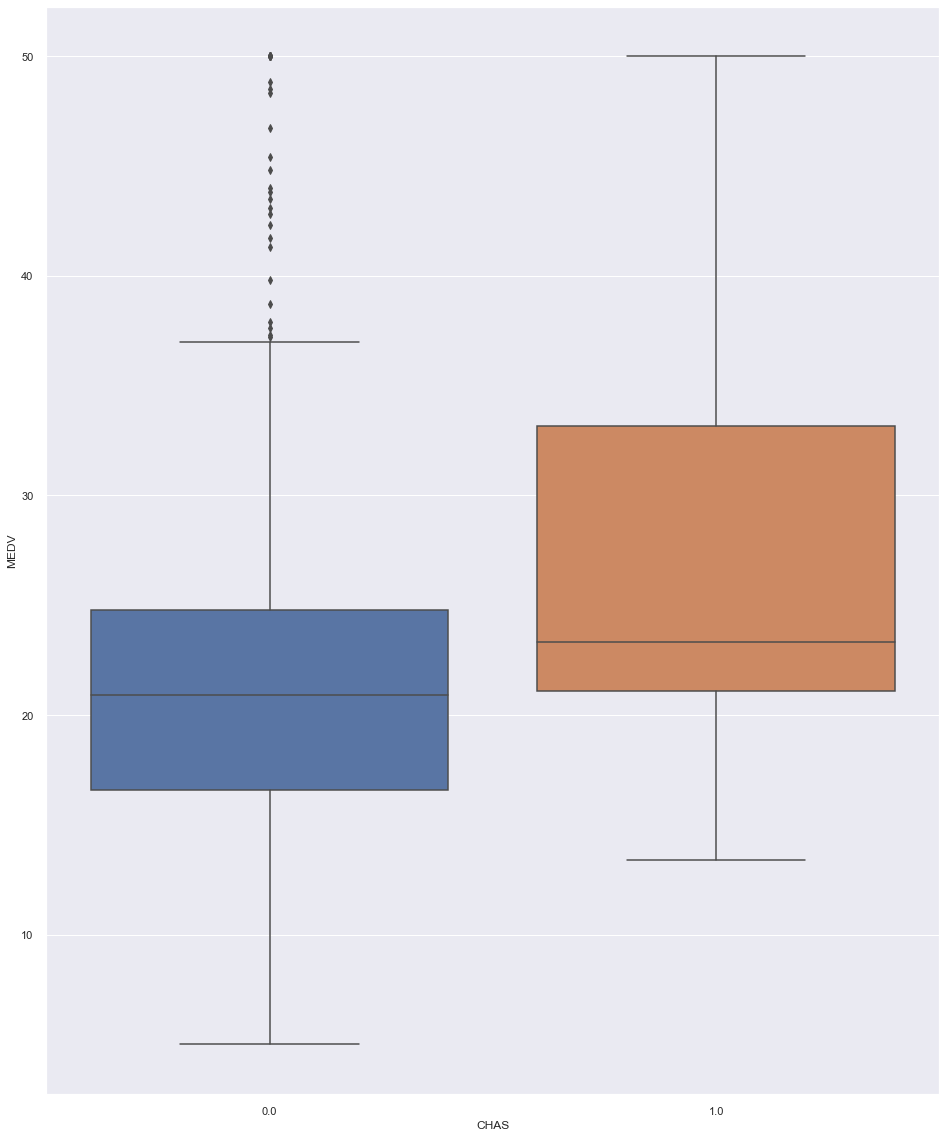

In [41]:
# Grouped boxplot
sns.boxplot(x = "CHAS", y = "MEDV", data = boston)
#sns.plt.show()

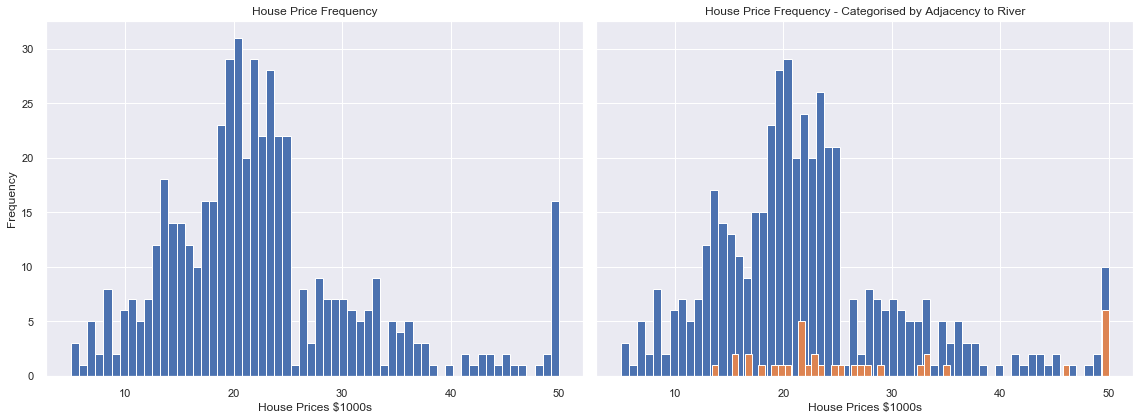

In [42]:
# Plotting histograms showing House Prices in total 
# and where the zone is beside the river
plt.rcParams['figure.figsize'] = [16, 6]
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].set_xlabel('House Prices $1000s')
axs[1].set_xlabel('House Prices $1000s')
axs[0].set_ylabel('Frequency')
axs[0].set_title("House Price Frequency")
axs[1].set_title("House Price Frequency - Categorised by Adjacency to River")
axs[0].hist(boston.MEDV, bins = 60)
axs[1].hist(boston.MEDV.where(boston.CHAS == 0.0), bins = 60)
axs[1].hist(boston.MEDV.where(boston.CHAS == 1.0), bins = 60)

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

Looking at the stats there and particularly the boxplots, it is clear that those houses adjacent to the river are higher in price (with a mean of \\$28K) than those non-adjacent houses(with a mean of \\$22K), although there is more of a spread in the non-adjacent.  

There are only 35 of the 506 houses deemed adjacent to the river, which equates to 6.9% of all houses.  

Looking at the histogram showing the distribution of the prices, we can see that the are a large amount of houses priced at the upper limit for both sets of data. The ones for adjacency to the Charles River appear to be over half of those non-adjacent properties, which is completely at odd with the 6.9% of total properties.

In [43]:
print("The % of houses at $50K with CHAS = 0 is", round(boston.MEDV.where((boston.MEDV == 50.0) &(boston.CHAS == 0.0)).count()*100/boston.loc[boston.CHAS == 0].MEDV.count(),2),"%")
print("The % of houses at $50K with CHAS = 1 is", round(boston.MEDV.where((boston.MEDV == 50.0) &(boston.CHAS == 1.0)).count()*100/boston.loc[boston.CHAS == 1].MEDV.count(),2),"%")

The % of houses at $50K with CHAS = 0 is 2.12 %
The % of houses at $50K with CHAS = 1 is 17.14 %


This shows a clear difference between the two attribute values. As we have seen earlier though - it is best to check it with actual mathematics! Lets perform a T-test.

In [44]:
# Perform t-test on the two datasets:
import scipy.stats as stats
stats.ttest_ind(boston.loc[boston.CHAS == 1].MEDV, boston.loc[boston.CHAS == 0].MEDV)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

The result above would indicate that these datasets were distinctly different with only a very small probability of the two being confused (p-value of $7.4 x 10^{-5}$). We can therefore reject the null hypothesis that the two datasets are the same and state that in fact they are statistically different from each other.

But what happens if, as we saw earlier, we thought that the MEDV values had a cap of \\$50K and we decided to exclude them? For convenience sake we will use the altBoston dataframe we create earlier.

In [45]:
# Perform t-test on the two amended datasets:
stats.ttest_ind(altBoston.loc[altBoston.CHAS ==1.0].MEDV, altBoston.loc[altBoston.CHAS == 0.0].MEDV)

Ttest_indResult(statistic=1.8389265568521393, pvalue=0.06655266530833404)

So, now with the reduced dataset the p value has massively increased to a point where we can no longer reject the null hypothesis that the two datasets are indistinguishable as there is much overlap between the two.

**Outliers**  
It is clear from the analysis to date that there appears to be a problem with the data at the higher end of the MEDV pricing. The upper limit of values appears capped at $50K. 

In [46]:
print(f"The number of rows with a MEDV value of $50K is {len(boston.loc[boston.MEDV == 50.0])}, which represents {len(boston.loc[boston.MEDV == 50.0])*100/len(boston)}% of the values")

The number of rows with a MEDV value of $50K is 16, which represents 3.1620553359683794% of the values


In [47]:
# List the top 5 most frequent house prices
boston.MEDV.value_counts().head()

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
Name: MEDV, dtype: int64

This is at twice the frequency of any and every other value. It is likely that there was a cap put on the upper end of the MEDV values and as such this contaminates the dataset. We have no way of knowing if the \\$50K is really \\$50K or \\$50M or more. There is an argument to be made therefore, to exclude these values from further analysis.   

We could do this in a number of ways.
Rather than just pick on this value we will exclude values that fall outside two standard deviations of the mean. This should to exclude any other less obvious issues.

In [48]:
# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean())
                          >= (sd * df[name].std()))]
    #df.drop(drop_rows, axis=0, inplace=True)
    return df.drop(drop_rows, axis=0)

In [49]:
dfNoOut = remove_outliers(boston, "MEDV", 2)

So how does this affect our list of "fishy" data?

In [50]:
# Print out the max and the no of rows that have that value
for fish in fishy:
    print("Before:",fish, "maximum =", boston[fish].max(), "and there are", boston[boston[fish] == boston[fish].max()][fish].count(), "rows with this value")
    print("After:",fish, "maximum =", dfNoOut[fish].max(), "and there are", dfNoOut[dfNoOut[fish] == dfNoOut[fish].max()][fish].count(), "rows with this value")
    print()

Before: AGE maximum = 100.0 and there are 43 rows with this value
After: AGE maximum = 100.0 and there are 41 rows with this value

Before: B maximum = 396.9 and there are 121 rows with this value
After: B maximum = 396.9 and there are 120 rows with this value

Before: MEDV maximum = 50.0 and there are 16 rows with this value
After: MEDV maximum = 39.8 and there are 1 rows with this value

Before: NOX maximum = 0.871 and there are 16 rows with this value
After: NOX maximum = 0.871 and there are 16 rows with this value

Before: RAD maximum = 24.0 and there are 132 rows with this value
After: RAD maximum = 24.0 and there are 127 rows with this value



Well, the answer is - not much! The effect of removing the MEDV outliers only substantially affected the MEDV maxima value counts.  

What happens if we remove all outliers?

In [51]:
dfNoAllOut.shape

NameError: name 'dfNoAllOut' is not defined

In [ ]:
dfNoAllOut = remove_outliers(dfNoOut, "AGE", 2)

In [ ]:
# Print out the max and the no of rows that have that value
for fish in fishy:
    print("Before:",fish, "maximum =", boston[fish].max(), "and there are", boston[boston[fish] == boston[fish].max()][fish].count(), "rows with this value")
    print("After:",fish, "maximum =", dfNoAllOut[fish].max(), "and there are", dfNoAllOut[dfNoAllOut[fish] == dfNoAllOut[fish].max()][fish].count(), "rows with this value")
    print()


Re-analysis

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
# Look at the correlation matrix - tallies well with results above.
correlation_matrix = dfNoOut.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
table = []
# for each attribute
for feature in bhp.feature_names:
    # Get the regression lines
    slope, intercept, r2_value, pvalue, stdErr = stats.linregress(dfNoOut.MEDV, dfNoOut[feature])
    # Append to a list
    table.append([feature, slope, intercept, r2_value, pvalue, stdErr])

# Create a dataframe with data
dfLinRegNoOut = pd.DataFrame(table, columns =["feature", "slope", "intercept", "rvalue", "pvalue", "stderr"])
dfLinRegNoOut

Removing the outliers has a significant effect on the correlation coefficients with respect to MEDV. Previously, with the outliers included only LSTAT (-0.74), RM (0.7) and PTRATIO (-0.51) had absolute coefficients greater than 0.5. With the outliers removed INDUS(-0.62), NOX(-0.57), AGE (-0.54), RAD(-0.51), TAX (-0.6) are also included in that list. Interestingly however PTRATIO has decreased to -0.48 and RM, one of the two most highly correlated variables has decreased to 0.6 from 0.7.

In [ ]:
# Setting the plot size
plt.rcParams['figure.figsize'] = [16,20]

# Plot both the raw data and the "best fit" lines
fig, axs = plt.subplots(4, 3, sharey=True)
fig.tight_layout()

# Need two counters here to take care of the fact we are not printing CHAS (1/0 values only)
i= 0

# Iterate through the features and plot each one
for feature in bhp.feature_names:
    # Exclude the CHAS and MEDV ones - MEDV we are already plotting against and CHAS as there is only 1 / 0 values
    if feature != "CHAS" and feature != "MEDV":
        # Scatter plot of original data
        axs[divmod(i, 3)].plot(dfNoOut[feature], dfNoOut.MEDV, 'bs', label= "original "+ feature + " data")
        # Add the calculated regression line
        axs[divmod(i, 3)].plot(dfLinReg.intercept[dfLinRegNoOut.feature == feature].item() + dfLinRegNoOut.slope[dfLinRegNoOut.feature == feature].item()*boston.MEDV, boston.MEDV, 'r', label="fitted "+ feature +" line")
        # And the legend
        axs[divmod(i, 3)].legend()
        # Add labels for x axis
        axs[divmod(i, 3)].text(.5,.9, feature, horizontalalignment="center",transform=axs[divmod(i, 3)].transAxes,fontsize=14)
        axs[divmod(i, 3)].set_xlabel(feature)
        # Increment the i counter for correct placement of plot
        i +=1

# Add y-axis labels
axs[0,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')
axs[1,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')
axs[2,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')
axs[3,0].set_ylabel('MEDV Median value of owner-occupied homes in $1000s')

# Titles
fig.suptitle('Factors Affecting House Prices', fontsize=18)


In [ ]:
# Perform t-test on the with outliers removed:
stats.ttest_ind(dfNoOut.loc[dfNoOut.CHAS < 1].MEDV,dfNoOut.loc[boston.CHAS == 1.0].MEDV)

With the outliers removed - it is not possible to distinguish the two datasets.

In [ ]:
import keras as ks

In [ ]:
boston_all = pd.DataFrame(bhp.data, columns=bhp.feature_names)

In [ ]:
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Divide the dataset into inputs and outputs
# Inputs = the data we know
# Output = what we are looking for
inputs_no = boston[['LSTAT', 'RM', 'INDUS', 'AGE','TAX', 'PTRATIO']]
outputs_no = boston['MEDV']
# Build the neural network
model_no = Sequential()
model_no.add(Dense(250, input_dim=inputs_no.shape[1], activation='relu')) # Hidden 1
model_no.add(Dense(50, activation='relu')) # Hidden 2
model_no.add(Dense(50, activation='elu')) # Hidden 2
model_no.add(Dense(50, activation='selu')) # Hidden 2
model_no.add(Dense(1)) # Output
model_no.compile(loss='mean_squared_error', optimizer='adam')
model_no.fit(inputs_no,outputs_no,verbose=2,epochs=1000)

#model_all.add(Dense(250, input_dim=inputs_all.shape[1], activation='relu')) # Hidden 1
#model_all.add(Dense(50, activation='linear')) # Hidden 2
#model_all.add(Dense(50, activation='relu')) # Hidden 2
#model_all.add(Dense(50, activation='relu')) # Hidden 2
#model_all.add(Dense(50, activation='relu')) # Hidden 2
#model_all.add(Dense(1)) # Output
#model_all.compile(loss='mean_squared_error', optimizer='adam')
#model_all.fit(inputs_all,outputs_all,verbose=2,epochs=500)

In [ ]:
pred_no = model_no.predict(inputs_no)
print("Shape: {}".format(pred_no.shape))
print(pred_no)

In [ ]:
# Measure RMSE error.  RMSE is common for regression.
score_no = np.sqrt(metrics.mean_squared_error(pred_no,outputs_no))
print(f"Final score (RMSE): {score_no}")

In [ ]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. LSTAT: {inputs_no['LSTAT'][i]}, RM: {inputs_no['RM'][i]} Actual MEDV: {outputs_no[i]}, predicted MEDV: {pred_no[i]}")

**With Outliers**

In [ ]:
# Divide the dataset into inputs and outputs
# Inputs = the data we know
# Output = what we are looking for
inputs_all = boston[['LSTAT', 'RM', 'INDUS', 'AGE','TAX', 'PTRATIO']]
outputs_all = boston['MEDV']
# Build the neural network
model_all = Sequential()
model_all.add(Dense(250, input_dim=inputs_all.shape[1], activation='relu')) # Hidden 1
model_all.add(Dense(50, activation='linear')) # Hidden 2
model_all.add(Dense(50, activation='relu')) # Hidden 2
model_all.add(Dense(50, activation='relu')) # Hidden 2
model_all.add(Dense(50, activation='relu')) # Hidden 2
model_all.add(Dense(1)) # Output
model_all.compile(loss='mean_squared_error', optimizer='adam')
model_all.fit(inputs_all,outputs_all,verbose=2,epochs=500, batch_size=10)

In [ ]:
pred_all = model_all.predict(inputs_no)
print("Shape: {}".format(pred_all.shape))
print(pred_all)

In [ ]:
# Measure RMSE error.  RMSE is common for regression.
score_all = np.sqrt(metrics.mean_squared_error(pred_all,outputs_all))
print(f"Final score (RMSE): {score_all}")

In [ ]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. LSTAT: {inputs_all['LSTAT'][i]}, RM: {inputs_all['RM'][i]} Actual MEDV: {outputs_all[i]}, predicted MEDV: {pred_all[i]}")

In [ ]:
plt.plot(inputs_all['LSTAT'], outputs_all, "g-")
plt.plot(inputs_all['LSTAT'], pred_all, "r-")


In [ ]:
a = "banana"
try:
  a = outputs_all[98]
except Exception: 
  pass
print(a)

In [ ]:
# Variances
var_all=[]
var_no=[]
for i in range(len(outputs_all)-1):
    try:
        var_all.append(outputs_all[i] - pred_all[i])
        var_no.append(outputs_no[i] - pred_no[i])
    except:
        pass
plt.plot(var_all, "g-")
plt.plot(var_no, "r-")

In [ ]:
table = [["Mean", np.mean(var_all), np.mean(var_no)], \
         ["Minimum", np.min(var_all), np.min(var_no)], \
         ["Maximum", np.max(var_all), np.max(var_no)], \
         ["Standard Devation", np.std(var_all), np.std(var_no)]]
hdr = ["Category", "All Data", "No Outliers"]
#print(tabulate(table, headers = hdr,  tablefmt="grid"))
# Put the data in a dataframe for easier manipulation
df = pd.DataFrame(table, columns=hdr)
df

## (60%) Predict: ##
Again using the same notebook, use keras [7] to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset. This part is worth 60%.

## References ##
[1] Boston Standard Metropolitan Statistical Area. Boston house prices dataset. https://www.kaggle.com/c/boston-housing.  
[2] https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155  
[3] https://pypi.org/project/tabulate/  
[4] Tensorflow Installation https://www.youtube.com/channel/UCR1-GEpyOPzT2AO4D_eifdw   
[5] Jeff Heaton Lecture 02-01  
[6] https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column  
[7] [Towards Data Science: My Journey into Deep Learning using Keras](https://towardsdatascience.com/my-journey-into-deeplearning-using-keras-part-1-67cbb50f65e6)  
[8] [PyImageSearch: Regression with Keras](https://www.pyimagesearch.com/2019/01/21/regression-with-keras/)  
[9] [**PyImageSearch: Keras Multiple Inputs and Mixed Data](https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/)  
[10] [**Data Camp: Keras Tutorial - Deep Learning Python Tutorial](https://www.datacamp.com/community/tutorials/deep-learning-python)  
[11] [** Data Camp: Exploratory Data Analysis with Python](https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python)  
[12] [* Towards Data Science: 4 Awesome Things You Can do With Keras](https://towardsdatascience.com/4-awesome-things-you-can-do-with-keras-and-the-code-you-need-to-make-it-happen-858f022eec85)  
[13] [* Towards Data Science: Building a Deep Learning Model Using Keras](https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37)  
[14] [**Machine Learning Mastery: Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)  
[15] [**Towards Data Science: Exploring Activation Functions for Neural Networks](https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02)  
[16] [**Deep Lizard: Batch Normalisation](https://deeplizard.com/learn/video/dXB-KQYkzNU)  
[17] [You Tube: Machine Learning Tutorial 1 - Linear Regression on Boston Housing Dataset | Machine Learning Basics](https://www.youtube.com/watch?v=ZeM2tHtjGy4)  
[18] [Towards Data Science: How to Increase the Accuracy of a Neural Network](https://towardsdatascience.com/how-to-increase-the-accuracy-of-a-neural-network-9f5d1c6f407d)  
[19] [Statistics by Jim: Multi-co-linearity in regression analysis](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)<a name="19"></a>  
[20] []()<a name = "20"></a>  
